In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from numpy import argmax
from numpy import array
from numpy import argmax

In [2]:
C=pd.read_csv('insurance_dataset_capstone_14.csv')
C

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500
1337,61.0,female,29.070,0.0,yes,northwest,29141.36030
1338,27.0,NaN,NaN,NaN,NaN,NaN,NaN


1a. Analysing datatypes of features

In [3]:
print(C.dtypes)

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object


1b. Checking for null values and removing them with appropriate method.

In [4]:
#first i check the current shape of my dataset
C.shape

(1340, 7)

In [5]:
C.isna().sum()
#from the output age column has 6 null valus while the rest have 2 each.

age         6
sex         2
bmi         2
children    2
smoker      2
region      2
charges     2
dtype: int64

In [6]:
#to remove the null values, i have to check if the values are discrete or continuous in other to know which method to apply.
# i will do this by doing the value counts of each column
C['age'].value_counts()

age
18.0    69
19.0    68
20.0    29
52.0    29
27.0    29
48.0    29
45.0    29
46.0    29
47.0    29
51.0    29
50.0    29
54.0    28
22.0    28
53.0    28
49.0    28
21.0    28
26.0    28
24.0    28
23.0    28
25.0    28
28.0    28
43.0    27
29.0    27
44.0    27
42.0    27
40.0    27
31.0    27
41.0    27
30.0    27
56.0    26
32.0    26
55.0    26
33.0    26
34.0    26
57.0    26
36.0    25
38.0    25
35.0    25
59.0    25
37.0    25
58.0    25
60.0    24
63.0    23
61.0    23
62.0    23
64.0    22
39.0    19
Name: count, dtype: int64

In [7]:
# age has continuous values therefore i will replace the null values with the mean of all age.
C.mean(numeric_only=True)

age            39.214393
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [8]:
C['age'].fillna(value=C['age'].mean())

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
1335    18.0
1336    21.0
1337    61.0
1338    27.0
1339    60.0
Name: age, Length: 1340, dtype: float64

In [9]:
C['age']=C['age'].fillna(value=C['age'].mean())
print(C.isna().sum())

age         0
sex         2
bmi         2
children    2
smoker      2
region      2
charges     2
dtype: int64


In [10]:
#for sex column
C['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [11]:
#sex is a discrete value as every row is categorized in to male or female
#so we will replace the null values with the mode value
mod_value=C['sex'].mode()
mod_value

0    male
Name: sex, dtype: object

In [12]:
print(type(mod_value))

<class 'pandas.core.series.Series'>


In [13]:
C['sex']=C['sex'].fillna(value=mod_value[0])
C['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1335    female
1336    female
1337    female
1338      male
1339      male
Name: sex, Length: 1340, dtype: object

In [14]:
print(C.isna().sum())

age         0
sex         0
bmi         2
children    2
smoker      2
region      2
charges     2
dtype: int64


In [15]:
#for bmi
#value counts show it is a continuous value so we replace null values with the mean
C['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [16]:
C['bmi']=C['bmi'].fillna(value=C['bmi'].mean())
C['bmi']

0       27.900000
1       33.770000
2       33.000000
3       22.705000
4       28.880000
          ...    
1335    36.850000
1336    25.800000
1337    29.070000
1338    30.663397
1339    30.663397
Name: bmi, Length: 1340, dtype: float64

In [17]:
C.isna().sum()

age         0
sex         0
bmi         0
children    2
smoker      2
region      2
charges     2
dtype: int64

In [18]:
C['children'].value_counts()
#Children is categorized between 0 to 5 hence can be considered as categorical
# we will use the mode value to replace null

children
0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: count, dtype: int64

In [19]:
mod_v=C['children'].mode()
mod_v

0    0.0
Name: children, dtype: float64

In [20]:
C['children']=C['children'].fillna(value=mod_v[0])
C['children']

0       0.0
1       1.0
2       3.0
3       0.0
4       0.0
       ... 
1335    0.0
1336    0.0
1337    0.0
1338    0.0
1339    0.0
Name: children, Length: 1340, dtype: float64

In [21]:
C.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      2
region      2
charges     2
dtype: int64

In [22]:
C['smoker'].value_counts()
#smoker column is categorical, therefore i will replace null value with mode

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
mod_s=C['smoker'].mode()
mod_s

0    no
Name: smoker, dtype: object

In [24]:
C['smoker']=C['smoker'].fillna(value=mod_s[0])
C['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1335     no
1336     no
1337    yes
1338     no
1339     no
Name: smoker, Length: 1340, dtype: object

In [25]:
C.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      2
charges     2
dtype: int64

In [26]:
C['region'].value_counts()
#region is also categorical therefore i will use the mode value as well

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [27]:
mod_r=C['region'].mode()
mod_r

0    southeast
Name: region, dtype: object

In [28]:
C['region']=C['region'].fillna(value=mod_r[0])
C['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1335    southeast
1336    southwest
1337    northwest
1338    southeast
1339    southeast
Name: region, Length: 1340, dtype: object

In [29]:
C.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     2
dtype: int64

In [30]:
#charges contain continuous values therefore i will replace null values with the mean
C['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [31]:
C['charges']=C['charges'].fillna(value=C['charges'].mean())
C['charges']

0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
            ...     
1335     1629.833500
1336     2007.945000
1337    29141.360300
1338    13270.422265
1339    13270.422265
Name: charges, Length: 1340, dtype: float64

In [32]:
C.isna().sum()
#now i have gotten rid of all null values.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

2a. I check for duplicates and drop them.

In [33]:
C.duplicated().sum()

1

In [34]:
C=C.drop_duplicates()

In [35]:
C.duplicated().sum()

0

In [36]:
C.shape

(1339, 7)

2b. I remove outliers

In [37]:
C.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.229489,30.663452,1.094100,13279.108493
std,14.049287,6.095907,1.205414,12101.305185
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4746.698450
50%,39.214393,30.400000,1.000000,9391.346000
75%,51.000000,34.687500,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [38]:
#using statistical method to remove outliers from bmi column
q1 = np.quantile(C['bmi'], 0.25)
q3 = np.quantile(C['bmi'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

26.302500000000002 34.6875


8.384999999999998

<Axes: ylabel='bmi'>

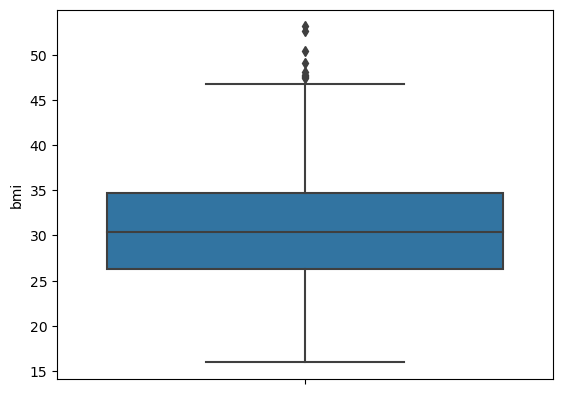

In [39]:
sns.boxplot(data=C, y='bmi')

In [40]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

13.725000000000005 47.265


In [41]:
bmi_index = C.index[ (C['bmi'] < lower_limit) | (C['bmi'] > upper_limit) ]
print(bmi_index)

Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')


In [42]:
C = C.drop(bmi_index)
print(C.shape)

(1330, 7)


<Axes: ylabel='charges'>

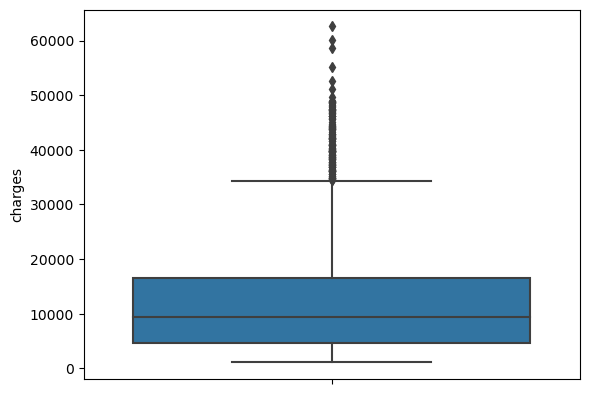

In [43]:
sns.boxplot(data=C, y='charges')

In [44]:
q1 = np.quantile(C['charges'], 0.25)
q3 = np.quantile(C['charges'], 0.75)
print(q1,q3)
IQR = q3-q1
IQR

4746.521225 16584.318157499998


11837.796932499998

In [45]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit,upper_limit)

-13010.174173749994 34341.01355624999


In [46]:
charges_index = C.index[ (C['charges'] < lower_limit) | (C['charges'] > upper_limit) ]
print(charges_index)

Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
       ...
       1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
      dtype='int64', length=138)


In [47]:
C = C.drop(charges_index)
print(C.shape)

(1192, 7)


In [48]:
print(C.dtypes)

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object


In [49]:
C['sex']=C['sex'].astype('category')
C['children']=C['children'].astype('category')
C['smoker']=C['smoker'].astype('category')
C['region']=C['region'].astype('category')

In [50]:
print(C.dtypes)

age          float64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object


<Axes: xlabel='sex', ylabel='count'>

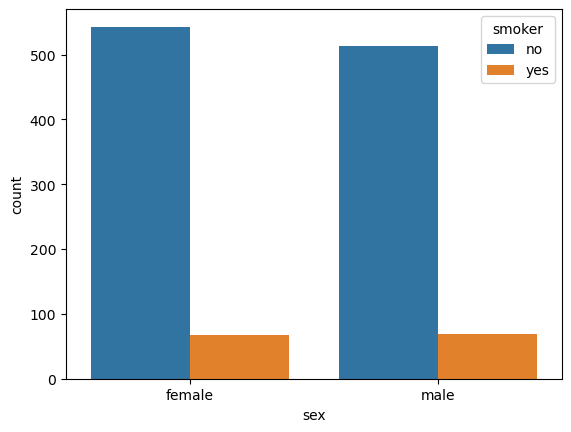

In [51]:
# i will draw a countplot for categorical features
sns.countplot(data=C,x='sex',hue='smoker')

<Axes: xlabel='children', ylabel='count'>

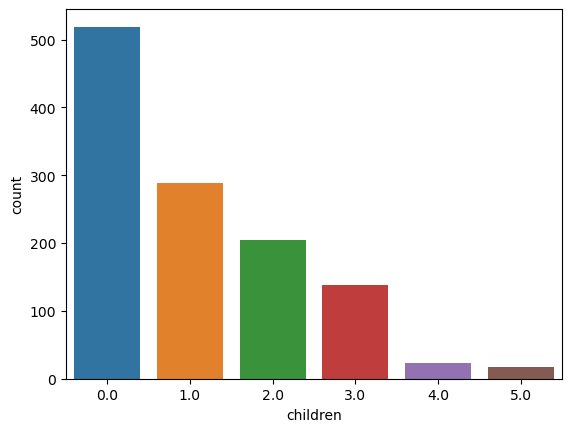

In [52]:
sns.countplot(data=C,x='children')

<Axes: xlabel='smoker', ylabel='count'>

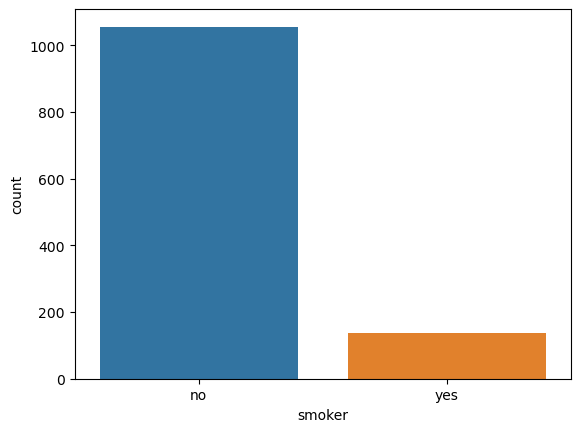

In [53]:
sns.countplot(data=C,x='smoker')

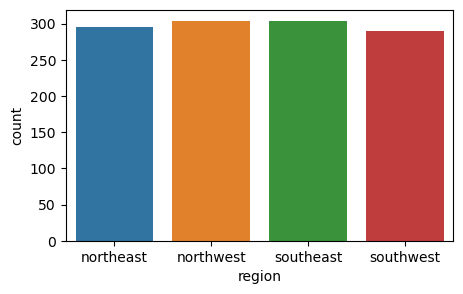

In [54]:
plt.figure(figsize=(5,3))
sns.countplot(data=C,x='region')
plt.show()

<Axes: xlabel='region', ylabel='count'>

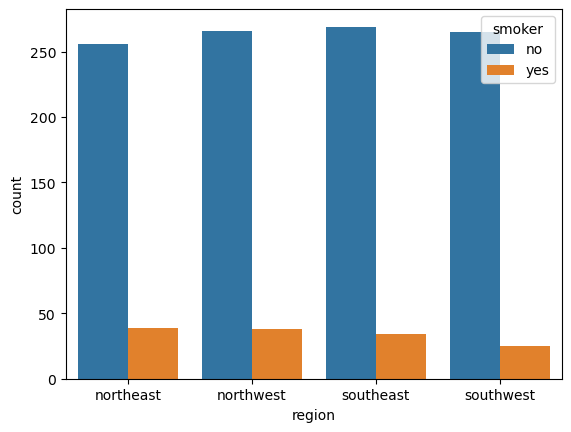

In [55]:
sns.countplot(data=C,x='region', hue='smoker')

C:\Users\Samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


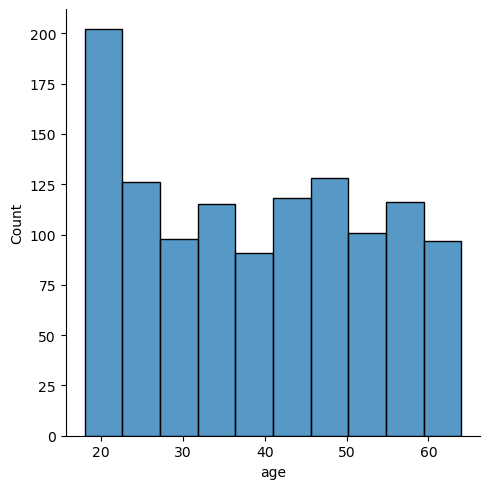

In [56]:
# i will draw a histogram for numeric features
sns.displot(data=C, x='age',bins=10)

C:\Users\Samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


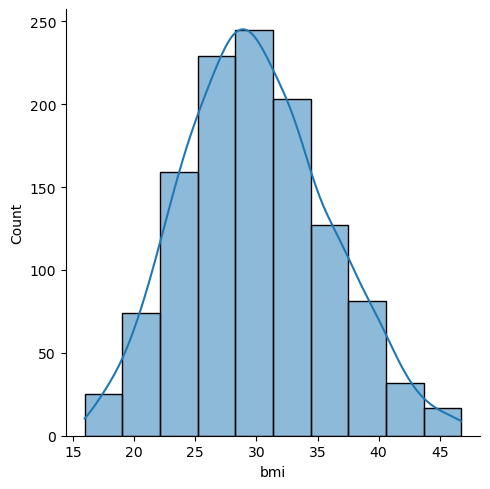

In [57]:
sns.displot(data=C, x='bmi',bins=10,kde=True)

C:\Users\Samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


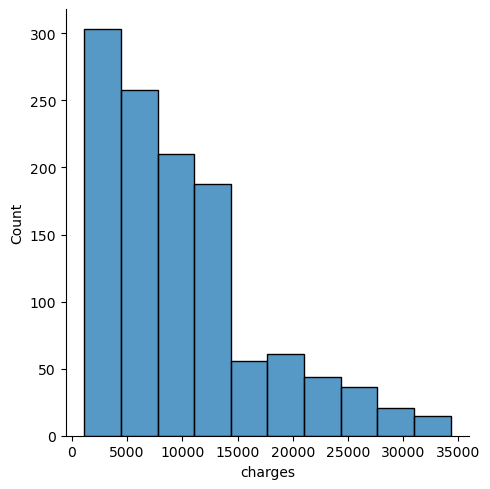

In [58]:
sns.displot(data=C, x='charges',bins=10)

3a Compute skewness for numeric features

In [59]:
C.skew(numeric_only=True)

age        0.067431
bmi        0.264870
charges    1.157934
dtype: float64

""''The age and bmi columns are not skewed as they have a skewness values of below 0.5 while the charges column is considerably skewed as the skewness value is above 1 but below 3.

3b using correlation with heatmap.

In [60]:
mymatrix=C.corr(numeric_only=True)
mymatrix

,age,bmi,charges
age,1.000000,0.123907,0.447691
bmi,0.123907,1.000000,-0.064318
charges,0.447691,-0.064318,1.000000


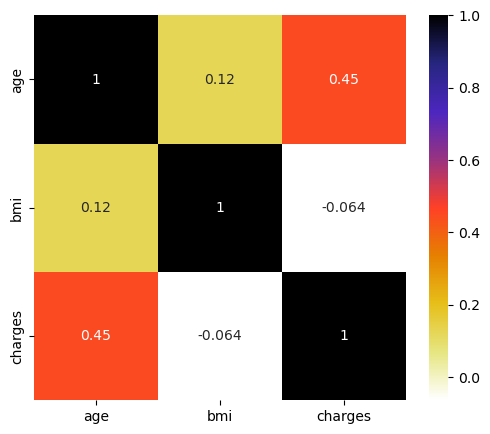

In [61]:
plt.figure(figsize=(6,5))
sns.heatmap(mymatrix,cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

"""" the heat map above shows that their is a high correlation between age and charges and very low correlation between bmi and charges.

3c. plotting a scatter plot between age and charges, using sex as a hue parameter.

C:\Users\Samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


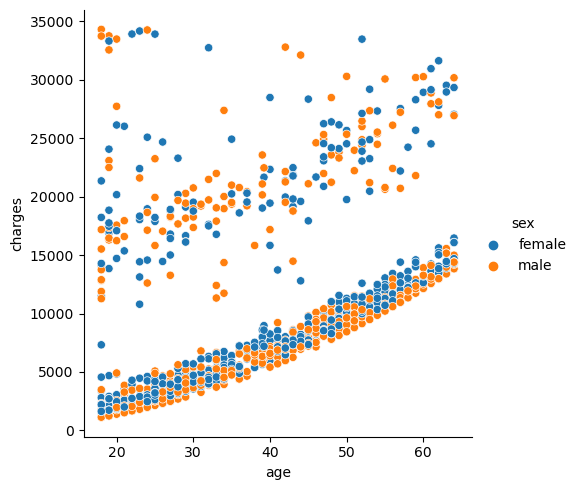

In [62]:
sns.relplot(data=C,x='age',y='charges',hue='sex')

""' the figure above shows that between the ages of 20 and 40, charges are more concentrated between 1000 and 5000. But from 40 to 60 years, charges are more concentrated between 5000 and 15000. Also their are fewer people who paid above 15000 across the ages and sex. Also sex is not a factor of how people are charged.

3d. applying a scaling method to at least two independent feature engineering

In [63]:
C

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900000,0.0,yes,southwest,16884.924000
1,18.0,male,33.770000,1.0,no,southeast,1725.552300
2,28.0,male,33.000000,3.0,no,southeast,4449.462000
3,33.0,male,22.705000,0.0,no,northwest,21984.470610
4,32.0,male,28.880000,0.0,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1335,18.0,female,36.850000,0.0,no,southeast,1629.833500
1336,21.0,female,25.800000,0.0,no,southwest,2007.945000
1337,61.0,female,29.070000,0.0,yes,northwest,29141.360300
1338,27.0,male,30.663397,0.0,no,southeast,13270.422265


3d. Applying a scaling method to two independent features Feature engineering

In [64]:
#using MinMaxScaler() for Min max Scaling
scaler=MinMaxScaler()
X=C[['age']]
X_scaled=scaler.fit_transform(X)
print(X_scaled)
C['age']=X_scaled

[[0.02173913]
 [0.        ]
 [0.2173913 ]
 ...
 [0.93478261]
 [0.19565217]
 [0.91304348]]


In [65]:
scaler=MinMaxScaler()
Y=C[['bmi']]
Y_scaled=scaler.fit_transform(Y)
print(Y_scaled)
C['bmi']=Y_scaled

[[0.38778824]
 [0.57843456]
 [0.55342644]
 ...
 [0.42578759]
 [0.47753806]
 [0.47753806]]


In [66]:
C

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.387788,0.0,yes,southwest,16884.924000
1,0.000000,male,0.578435,1.0,no,southeast,1725.552300
2,0.217391,male,0.553426,3.0,no,southeast,4449.462000
3,0.326087,male,0.219065,0.0,no,northwest,21984.470610
4,0.304348,male,0.419617,0.0,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1335,0.000000,female,0.678467,0.0,no,southeast,1629.833500
1336,0.065217,female,0.319584,0.0,no,southwest,2007.945000
1337,0.934783,female,0.425788,0.0,yes,northwest,29141.360300
1338,0.195652,male,0.477538,0.0,no,southeast,13270.422265


4. converting categorical features into numeric one using appropriate encoding technique

In [67]:
print(C['sex'].unique())
sex_encoder=LabelEncoder()
print(C['sex'])
sex_encoder.fit(C['sex'])  #mapping table created
sex_values=sex_encoder.transform(C['sex'])
C['sex']= sex_values
print(sex_encoder.classes_)
sex_values

['female', 'male']
Categories (2, object): ['female', 'male']
0       female
1         male
2         male
3         male
4         male
         ...  
1335    female
1336    female
1337    female
1338      male
1339      male
Name: sex, Length: 1192, dtype: category
Categories (2, object): ['female', 'male']
['female' 'male']


array([0, 1, 1, ..., 0, 1, 1])

In [68]:
C

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.387788,0.0,yes,southwest,16884.924000
1,0.000000,1,0.578435,1.0,no,southeast,1725.552300
2,0.217391,1,0.553426,3.0,no,southeast,4449.462000
3,0.326087,1,0.219065,0.0,no,northwest,21984.470610
4,0.304348,1,0.419617,0.0,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1335,0.000000,0,0.678467,0.0,no,southeast,1629.833500
1336,0.065217,0,0.319584,0.0,no,southwest,2007.945000
1337,0.934783,0,0.425788,0.0,yes,northwest,29141.360300
1338,0.195652,1,0.477538,0.0,no,southeast,13270.422265


In [69]:
print(C['smoker'].unique())
smoker_encoder=LabelEncoder()
print(C['smoker'])
smoker_encoder.fit(C['smoker'])  #mapping table created
smoker_values=smoker_encoder.transform(C['smoker'])
C['smoker']= smoker_values
print(smoker_encoder.classes_)
smoker_values

['yes', 'no']
Categories (2, object): ['no', 'yes']
0       yes
1        no
2        no
3        no
4        no
       ... 
1335     no
1336     no
1337    yes
1338     no
1339     no
Name: smoker, Length: 1192, dtype: category
Categories (2, object): ['no', 'yes']
['no' 'yes']


array([1, 0, 0, ..., 1, 0, 0])

In [70]:
print(C['region'].unique())
region_encoder=LabelEncoder()
print(C['region'])
region_encoder.fit(C['region'])
region_values=region_encoder.transform(C['region'])
C['region']= region_values
print(region_encoder.classes_)
region_values

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1335    southeast
1336    southwest
1337    northwest
1338    southeast
1339    southeast
Name: region, Length: 1192, dtype: category
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']
['northeast' 'northwest' 'southeast' 'southwest']


array([3, 2, 2, ..., 1, 2, 2])

In [71]:
C

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.387788,0.0,1,3,16884.924000
1,0.000000,1,0.578435,1.0,0,2,1725.552300
2,0.217391,1,0.553426,3.0,0,2,4449.462000
3,0.326087,1,0.219065,0.0,0,1,21984.470610
4,0.304348,1,0.419617,0.0,0,1,3866.855200
...,...,...,...,...,...,...,...
1335,0.000000,0,0.678467,0.0,0,2,1629.833500
1336,0.065217,0,0.319584,0.0,0,3,2007.945000
1337,0.934783,0,0.425788,0.0,1,1,29141.360300
1338,0.195652,1,0.477538,0.0,0,2,13270.422265


In [72]:
C.shape

(1192, 7)

5.  Considering ‘charges’ column is y_variable (Regression variable). Apply any 
feature selection method to it to reduce the dataset size to four features

In [73]:
# I will subdivide the C dataset into two variables X & Y. X will be the independent variable and Y will be the dependent variable.
Y=C['charges']
X=C.drop(['charges'], axis=1)

print(Y.shape)
print(X.shape)

(1192,)
(1192, 6)


In [74]:
print(Y.value_counts())
print(X.columns)

charges
13270.422265    2
8688.858850     1
1634.573400     1
2221.564450     1
19798.054550    1
               ..
4032.240700     1
7512.267000     1
4762.329000     1
5910.944000     1
4837.582300     1
Name: count, Length: 1191, dtype: int64
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [75]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=10, test_size=0.3,) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y.value_counts())
print(Y_train.value_counts())
print(Y_test.value_counts())

(834, 6)
(358, 6)
(834,)
(358,)
charges
13270.422265    2
8688.858850     1
1634.573400     1
2221.564450     1
19798.054550    1
               ..
4032.240700     1
7512.267000     1
4762.329000     1
5910.944000     1
4837.582300     1
Name: count, Length: 1191, dtype: int64
charges
13270.422265    2
3500.612300     1
12981.345700    1
12648.703400    1
4340.440900     1
               ..
8527.532000     1
10807.486300    1
2404.733800     1
10982.501300    1
7133.902500     1
Name: count, Length: 833, dtype: int64
charges
1694.79640     1
17904.52705    1
3704.35450     1
4402.23300     1
15612.19335    1
              ..
9724.53000     1
8334.58960     1
9872.70100     1
23967.38305    1
8233.09750     1
Name: count, Length: 358, dtype: int64


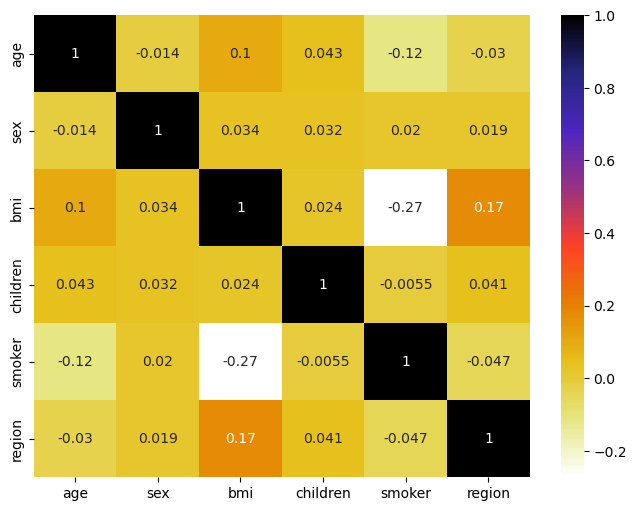

In [77]:
#using Pearson Correlation
###Unsupervised
cor=X_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor,cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [78]:
#finding the correlated features
def correlation(dataset, threshold):
    corr_pairs=tuple()
    all_pairs=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                print(abs(corr_matrix.iloc[i,j]))
                corr_pairs=(corr_matrix.columns[i],corr_matrix.columns[j],corr_matrix.iloc[i,j])
                all_pairs.append(corr_pairs)
    return all_pairs

In [79]:
corr_feature_pairs= correlation(X_train, 0.1) #0.6 as threshold will return all corr values >+or- 0.6
corr_feature_pairs

0.10210289854135297
0.11734202408530944
0.2729058784238787
0.17476691237559255


[('bmi', 'age', 0.10210289854135297),
 ('smoker', 'age', -0.11734202408530944),
 ('smoker', 'bmi', -0.2729058784238787),
 ('region', 'bmi', 0.17476691237559255)]

In [80]:
#to reduce the size of my dataset, i will single out only columns with high correlation.
corr_features=['bmi','smoker']

In [81]:
print(X_train.shape)
print(X_test.shape)

(834, 6)
(358, 6)


In [82]:
#removing correlated features
X_train.drop(corr_features, axis=1, inplace=True) 
X_test.drop(corr_features, axis=1, inplace=True)
print(X_train.shape)
print(X_test.shape)

(834, 4)
(358, 4)


In [83]:
X_train.columns

Index(['age', 'sex', 'children', 'region'], dtype='object')